# Big Data Coursework (BNM832) - Individual Assignment

Name: Mustafa Scentwala; Student ID: 230295100

# Table of Contents:

### 1. Business Objective
### 2. Data Preparation and Initial Analysis
##### 2.1 Histograms
##### 2.2 Correlation heatmap
##### 2.3 Bar Chart
### 3. Baseline model: Logistic Regression
### 4. Over-Sampling the dataset
### 5. Model Evaluation with Hyperparameter Tuning
##### 5.1 Logistic Regression 
##### 5.2 Decision Tree Classifier
##### 5.3 Random Forest Classifier
##### 5.4 XGBoost Classifier
##### 5.5 Summary and Model Selection
### 6. Conclusion
### 7. Possible Future Improvements
### 8. References

# 1. Business Objective

The automotive industry's primary objective is to ensure passenger safety and reduce the severity of accidents. This project focuses on predictive analysis for the Audi A3, with the goal of classifying accident severity as fatal, serious, or minor. This is accomplished by assessing technical vehicle data as well as situational considerations like road conditions. Initially, a baseline logistic regression model delivers basic insights without regard for oversampling. To improve the model's robustness, we use SMOTE to resolve data imbalances before proceeding. Our investigation then progresses to fine tuned prediction models such as logistic regression, Decision Trees, Random Forest, and XGBoost. The hyperparameters of each model are carefully tuned to maximize predicted accuracy. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df_train = pd.read_csv("trainset.csv")
df_test = pd.read_csv("testset.csv")

In [3]:
print(df_train.head())

   casualty_class  sex_of_casualty  vehicle_manoeuvre  \
0       -0.638111         1.156847          -0.444433   
1        2.722775         1.156847           0.684329   
2       -0.638111        -0.864418           0.111062   
3        1.042332         1.156847          -1.056940   
4       -0.638111        -0.864418          -1.332360   

   vehicle_leaving_carriageway  number_of_casualties  second_road_class  \
0                    -0.349682              0.184810          -1.050527   
1                    -0.349682             -0.887055           1.111243   
2                    -0.349682              0.184810           1.111243   
3                    -0.349682              0.184810           1.111243   
4                    -0.349682              1.535201           1.111243   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                 2.266025         -0.668552   
1                                 2.266025          1.008096   
2             

In [4]:
print(df_test.head())

   casualty_class  sex_of_casualty  vehicle_manoeuvre  \
0       -0.638111        -0.864418           0.684329   
1        1.042332        -0.864418           0.684329   
2        1.042332         1.156847          -2.104027   
3        1.042332         1.156847          -1.332360   
4       -0.638111         1.156847          -0.622360   

   vehicle_leaving_carriageway  number_of_casualties  second_road_class  \
0                    -0.349682             -0.887055           0.390653   
1                    -0.349682              0.945311           1.111243   
2                    -0.349682             -0.887055          -1.050527   
3                    -0.349682              2.777677          -1.050527   
4                    -0.349682             -0.887055           0.030358   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                 2.879896         -0.668552   
1                                -0.446686         -0.668552   
2             

# 2. Initial Analysis of the Dataset

The predictive modeling process starts with loading the datasets for training and testing. The target variable, `accident_severity`, is categorized into three ordinal classes: `1 for fatal`, `2 for serious`, and `3 for minor accidents`.

Preprocessing steps including data cleaning, transformation, and normalization have been previously applied to the datasets. 

## 2.1 Histograms

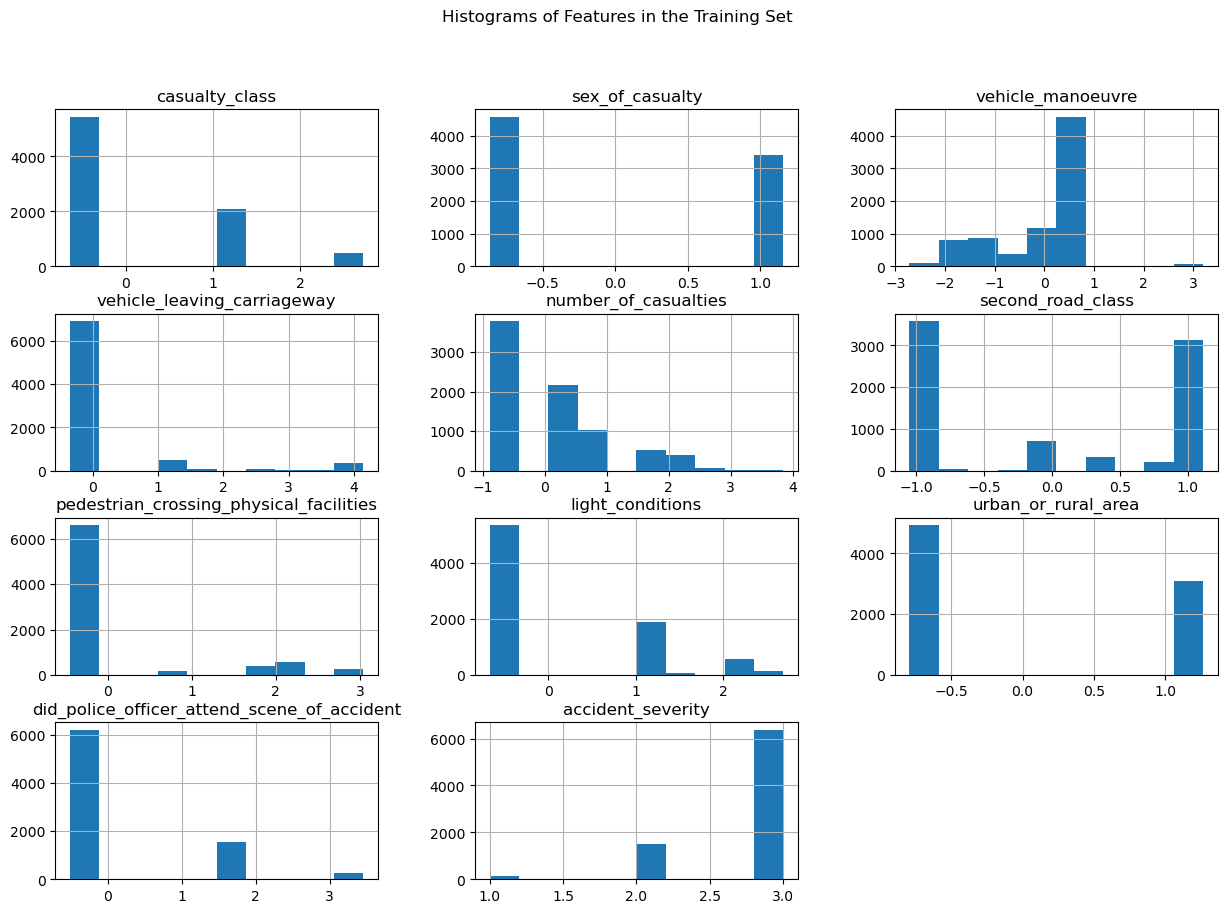

In [5]:
# Histograms for each feature in the training set
df_train.hist(figsize=(15, 10))
plt.suptitle("Histograms of Features in the Training Set")
plt.show()

The majority of the data points are grouped in the centre of the histograms, which offer a standardised scale for the variables. This demonstrates how the influence of each attribute was balanced through the use of normalisation. Three separate peaks in the `accident_severity` column correspond to the different accident severity categories, suggesting that the dataset is fairly balanced in terms of severity classification.

## 2.2 Correlation heatmap

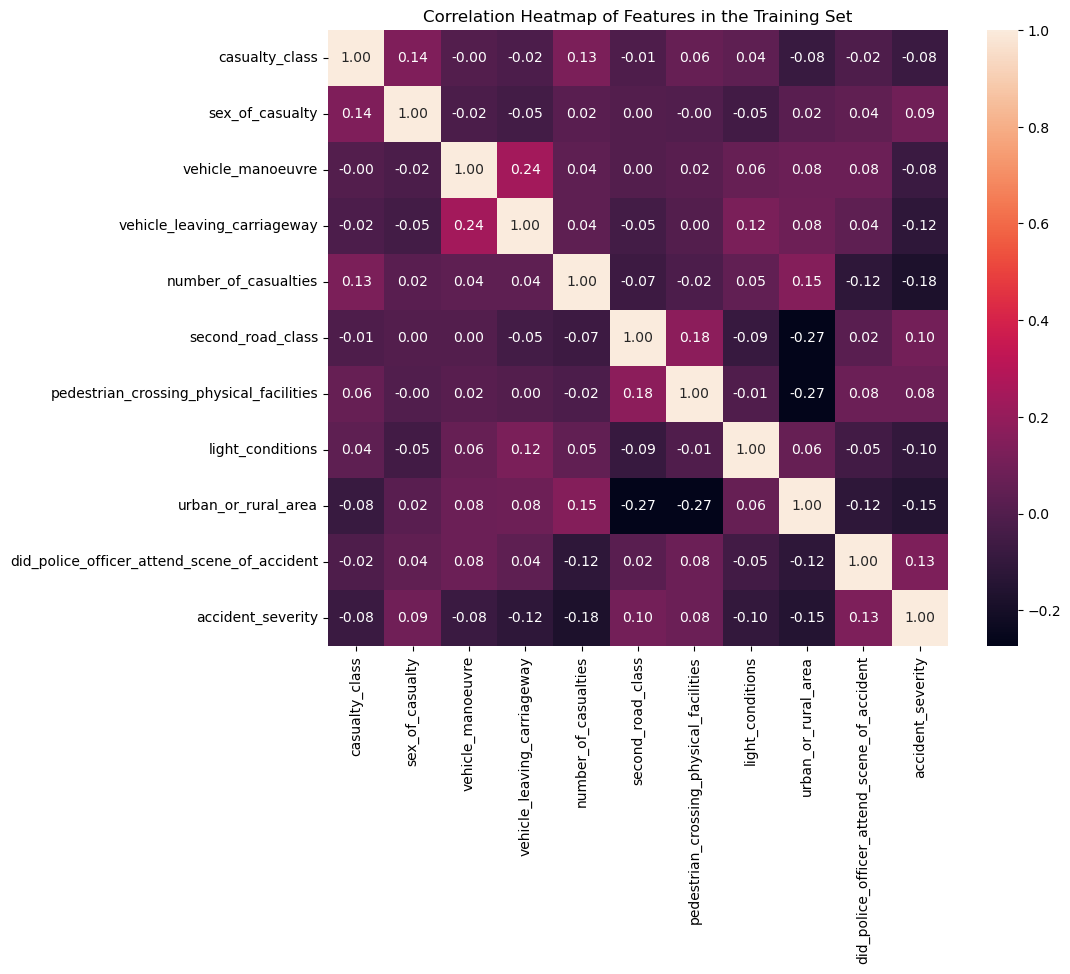

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features in the Training Set")
plt.show()

Variability may not be a problem since the correlation heatmap indicates no significant association between variables and the target 'accident_severity'. Since there are no significant connections, it is impossible to identify a single dominant trait that influences the severity of accidents. As a result, a model that can capture intricate relationships between variables must be created.

## 2.3 Bar Chart

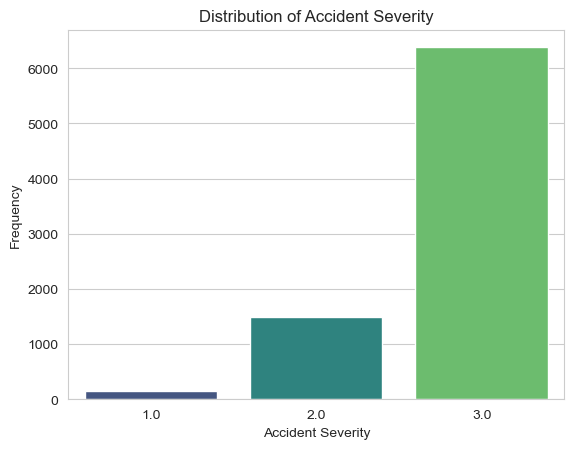

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure()
sns.countplot(x='accident_severity', data=df_train, palette='viridis')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')
plt.show()

The bar chart illustrates the distribution of accident severity in the training dataset, which reveals a significant imbalance across the classes, suggesting that the predictive model may show a bias towards identifying accidents as minor due to the higher occurrence rate of this class in the data.

# 3. Baseline model: Logistic Regression

The baseline logistic regression model serves as the starting point for the predictive analysis.

Classification Report for Training Set:
              precision    recall  f1-score   support

         1.0       0.50      0.01      0.03       146
         2.0       0.57      0.04      0.07      1484
         3.0       0.80      1.00      0.89      6381

    accuracy                           0.80      8011
   macro avg       0.63      0.35      0.33      8011
weighted avg       0.76      0.80      0.72      8011

Classification Report for Testing Set:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        28
         2.0       0.57      0.05      0.09       365
         3.0       0.81      0.99      0.89      1539

    accuracy                           0.80      1932
   macro avg       0.46      0.35      0.33      1932
weighted avg       0.75      0.80      0.73      1932



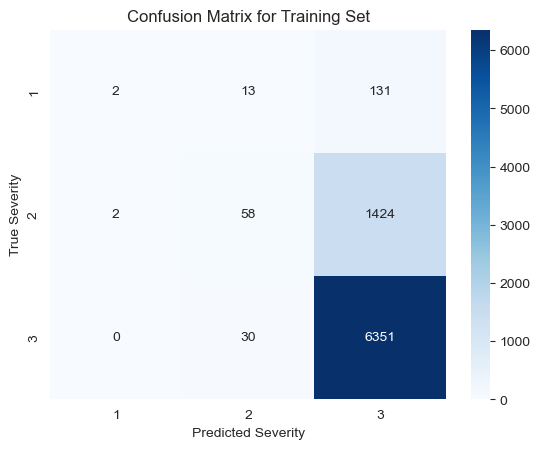

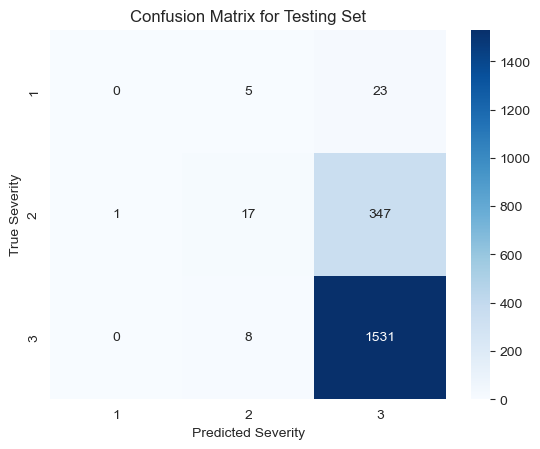

In [8]:
from sklearn.linear_model import LogisticRegression

X_train = df_train.drop('accident_severity', axis=1)
y_train = df_train['accident_severity']
X_test = df_test.drop('accident_severity', axis=1)
y_test = df_test['accident_severity']

# Initializing Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fitting the model to the training data
logreg.fit(X_train, y_train)

# Predicting on the training data
y_train_pred = logreg.predict(X_train)

# Predicting on the testing data
y_test_pred = logreg.predict(X_test)

# Classification report for training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

# Classification report for testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix for Training Set')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()

sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()

On the training set the model achieves an overall accuracy of 80% and the classification report shows that it performs well at identifying minor accidents but struggles with `fatal` and `serious` ones, as shown by low recall rates. On the testing set there is high accuracy in the correct predictions of `minor accidents` shown by the confusion matrix aswell. The dark blues on the diagonal for the `minor accidents` class suggest that the model predominantly predicts accidents to be `minor`, highlighting a potential class imbalance issue.

The baseline model establishes the initial benchmark for testing other models.

# 4. Over-Sampling the dataset

Oversampling with SMOTE is essential in our case to ensure that the predictive model is not biased toward the most common class and can accurately recognize and predict all levels of accident severity.

In [9]:
from imblearn.over_sampling import SMOTE

X = df_train.drop('accident_severity', axis=1)
y = df_train['accident_severity']

# Initializing SMOTE
smote = SMOTE()

# Applying SMOTE only on the training set
X_smote, y_smote = smote.fit_resample(X, y)

# Checking the balance of the classes
print("Label '1': {}".format(sum(y_smote == 1)))
print("Label '2': {}".format(sum(y_smote == 2)))
print("Label '3': {}".format(sum(y_smote == 3)))

Label '1': 6381
Label '2': 6381
Label '3': 6381


After SMOTE, each class of accident severity—`fatal accidents (1)`, `serious accidents (2)`, and `minor accidents (3)` has an equal count of `6381 instances`. This is important for training the predictive model, as it ensures that each class is represented equally, preventing the model from being biased towards the more frequently occurring class.

# 5. Model Evaluation with Hyperparameter Tuning

## 5.1 Logistic Regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.542286209871156
Classification Report for Training Set - Tuned Logistic Regression:
              precision    recall  f1-score   support

         1.0       0.58      0.74      0.65      6381
         2.0       0.43      0.27      0.33      6381
         3.0       0.56      0.63      0.59      6381

    accuracy                           0.54     19143
   macro avg       0.53      0.54      0.53     19143
weighted avg       0.53      0.54      0.53     19143



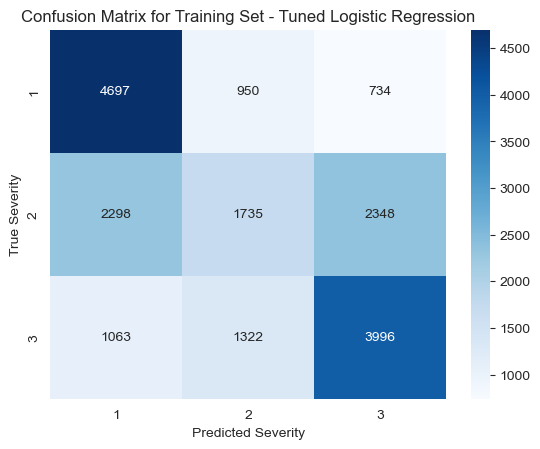

Classification Report for Testing Set - Tuned Logistic Regression:
              precision    recall  f1-score   support

         1.0       0.05      0.75      0.10        28
         2.0       0.21      0.24      0.23       365
         3.0       0.86      0.62      0.72      1539

    accuracy                           0.55      1932
   macro avg       0.37      0.54      0.35      1932
weighted avg       0.72      0.55      0.62      1932



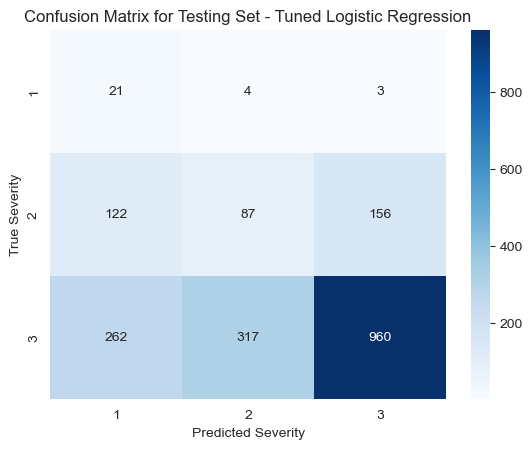

In [10]:
logreg = LogisticRegression(random_state=42)

# Defining the hyperparameters and their values to be tested
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Setting up the grid search with 5-fold cross-validation
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Performing the grid search on the training data
grid_search_logreg.fit(X_smote, y_smote)

print(f"Best parameters for Logistic Regression: {grid_search_logreg.best_params_}")
print(f"Best score for Logistic Regression: {grid_search_logreg.best_score_}")

# Training the model with the best parameters found
logreg_best = LogisticRegression(**grid_search_logreg.best_params_)
logreg_best.fit(X_smote, y_smote)

# Predicting on the training set with the best parameters
y_train_pred_best_logreg = logreg_best.predict(X_smote)

# Classification report for the training set
print("Classification Report for Training Set - Tuned Logistic Regression:")
print(classification_report(y_smote, y_train_pred_best_logreg))

# Confusion matrix for the training set
conf_matrix_train_best_logreg = confusion_matrix(y_smote, y_train_pred_best_logreg)
sns.heatmap(conf_matrix_train_best_logreg, annot=True, fmt='d', cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix for Training Set - Tuned Logistic Regression')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()

# Predicting on the test set with the best parameters
y_test_pred_best_logreg = logreg_best.predict(X_test)

# Classification report for the test set
print("Classification Report for Testing Set - Tuned Logistic Regression:")
print(classification_report(y_test, y_test_pred_best_logreg))

# Confusion matrix for the test set
conf_matrix_test_best_logreg = confusion_matrix(y_test, y_test_pred_best_logreg)
sns.heatmap(conf_matrix_test_best_logreg, annot=True, fmt='d', cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix for Testing Set - Tuned Logistic Regression')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()

After hyperparameter tunning on The Logistic Regression model via GridSearchCV, it demonstrates an average performance on the training data, with an accuracy of 54%. The confusion matrix reveals the model's ability to identifying fatal accidents.

Despite the model having a good recall for `fatal accidents (Class 1.0)` in the testing set, the precision is low. The high recall indicates the model's potential utility in flagging fatal outcomes, however the low precision could set off many false alarms, which is not practical for a real-world setting. 

The Logistic Regression model provides a baseline understanding, however more other models can deliver higher accuracy and a better balance between precision and recall.

## 5.2 Decision Tree Classifier

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.8530554507166748
Classification Report for Training Set - Tuned Decision Tree:
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      6381
         2.0       0.90      0.91      0.90      6381
         3.0       0.91      0.89      0.90      6381

    accuracy                           0.93     19143
   macro avg       0.93      0.93      0.93     19143
weighted avg       0.93      0.93      0.93     19143



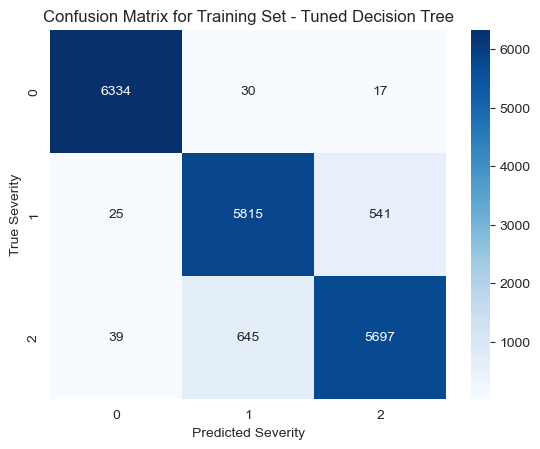

Classification Report for Testing Set - Tuned Decision Tree:
              precision    recall  f1-score   support

         1.0       0.50      0.75      0.60        28
         2.0       0.36      0.47      0.41       365
         3.0       0.87      0.80      0.83      1539

    accuracy                           0.74      1932
   macro avg       0.58      0.67      0.61      1932
weighted avg       0.77      0.74      0.75      1932



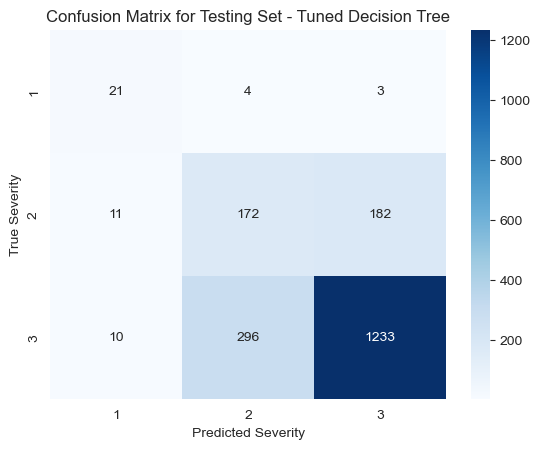

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

# Defining the hyperparameters and their values to be tested
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up the grid search with 5-fold cross-validation
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Performing the grid search on the training data
grid_search_dt.fit(X_smote, y_smote)

print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best score for Decision Tree: {grid_search_dt.best_score_}")

# Retraining the model with the best parameters found
dt_best = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
dt_best.fit(X_smote, y_smote)

# Predicting on the training set with the best parameters
y_train_pred_best_dt = dt_best.predict(X_smote)

# Classification report for the training set
print("Classification Report for Training Set - Tuned Decision Tree:")
print(classification_report(y_smote, y_train_pred_best_dt))

# Confusion matrix for the training set
conf_matrix_train_best_dt = confusion_matrix(y_smote, y_train_pred_best_dt)
sns.heatmap(conf_matrix_train_best_dt, annot=True, fmt='d', cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix for Training Set - Tuned Decision Tree')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()

# Predicting on the test set with the best parameters
y_test_pred_best_dt = dt_best.predict(X_test)

# Classification report for the test set
print("Classification Report for Testing Set - Tuned Decision Tree:")
print(classification_report(y_test, y_test_pred_best_dt))

# Confusion matrix for the test set
conf_matrix_test_best_dt = confusion_matrix(y_test, y_test_pred_best_dt)
sns.heatmap(conf_matrix_test_best_dt, annot=True, fmt='d', cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix for Testing Set - Tuned Decision Tree')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()

The model demonstrated an improved best score of 85% on the balanced training set. The optimal hyperparameters identified were a max_depth of 30, min_samples_leaf of 1, and min_samples_split of 2.

The classification report for the training set shows high precision and recall for predicting fatal accidents (class 1.0), which shows that the model is effective in identifying the most severe outcomes. Performance on `seious` `(class 2.0)` and `minor accidents (class 3.0)` was also good, shown by the high recall score.

On the testing set, the tuned Decision Tree gave an accuracy of 74%, with a good recall for the `fatal` and `minor` accident classes. However, the performance on `serious accidents (class 2.0)`, could be improved as also shown by the confusion matrix.

## 5.3 Random Forest Classifier

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.8770333944355253
Classification Report for Training Set - Tuned Random Forest:
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      6381
         2.0       0.90      0.90      0.90      6381
         3.0       0.90      0.90      0.90      6381

    accuracy                           0.93     19143
   macro avg       0.93      0.93      0.93     19143
weighted avg       0.93      0.93      0.93     19143



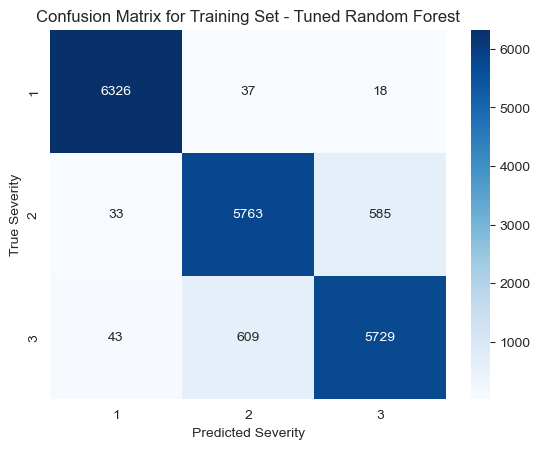

Classification Report for Testing Set - Tuned Random Forest:
              precision    recall  f1-score   support

         1.0       0.55      0.64      0.59        28
         2.0       0.36      0.42      0.39       365
         3.0       0.86      0.82      0.84      1539

    accuracy                           0.75      1932
   macro avg       0.59      0.63      0.61      1932
weighted avg       0.76      0.75      0.75      1932



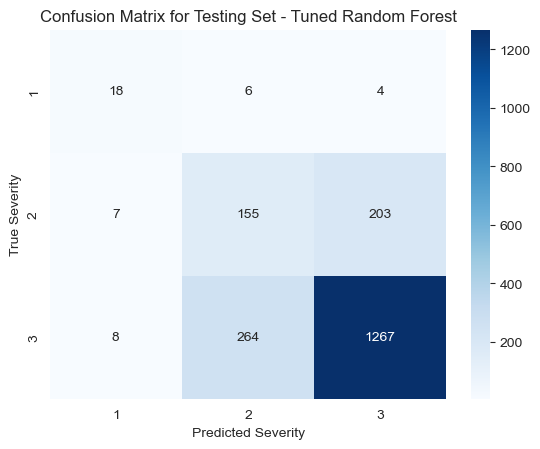

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# Defining the hyperparameters and their values to be tested
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Setting up the grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Performing the grid search on the training data
grid_search_rf.fit(X_smote, y_smote)

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")

# Retraining the model with the best parameters found
rf_best = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
rf_best.fit(X_smote, y_smote)

# Predicting on the training set with the best parameters
y_train_pred_best_rf = rf_best.predict(X_smote)

# Classification report for the training set
print("Classification Report for Training Set - Tuned Random Forest:")
print(classification_report(y_smote, y_train_pred_best_rf))

# Confusion matrix for the training set
conf_matrix_train_best_rf = confusion_matrix(y_smote, y_train_pred_best_rf)
sns.heatmap(conf_matrix_train_best_rf, annot=True, fmt='d', cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix for Training Set - Tuned Random Forest')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()

# Predicting on the test set with the best parameters
y_test_pred_best_rf = rf_best.predict(X_test)

# Classification report for the test set
print("Classification Report for Testing Set - Tuned Random Forest:")
print(classification_report(y_test, y_test_pred_best_rf))

# Confusion matrix for the test set
conf_matrix_test_best_rf = confusion_matrix(y_test, y_test_pred_best_rf)
sns.heatmap(conf_matrix_test_best_rf, annot=True, fmt='d', cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix for Testing Set - Tuned Random Forest')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()

After the hyperparameter tuning on The Random Forest model, the grid search determined the best parameters to be 200 trees (n_estimators), a max_depth of 20, and a min_samples_split of 2 and the model achieved an accuracy of 93% on the training dataset.

The classification report shows a high precision and recall across all severity levels on the training data, particularly for the `fatal accidents (Class 1.0)`. On the testing set, while precision for `serious accidents (Class 2.0)` could be improved, the model had a good recall score for `fatal accidents (Class 1.0)` and good precision and recall for `minor accidents (Class 3.0)`.

## 5.4 XGBoost Classifier

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 100}
Best score for XGBoost: 0.8781832700070108
Classification Report for Training Set - Tuned XGBoost:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6381
         1.0       0.90      0.87      0.88      6381
         2.0       0.87      0.91      0.89      6381

    accuracy                           0.92     19143
   macro avg       0.92      0.92      0.92     19143
weighted avg       0.92      0.92      0.92     19143



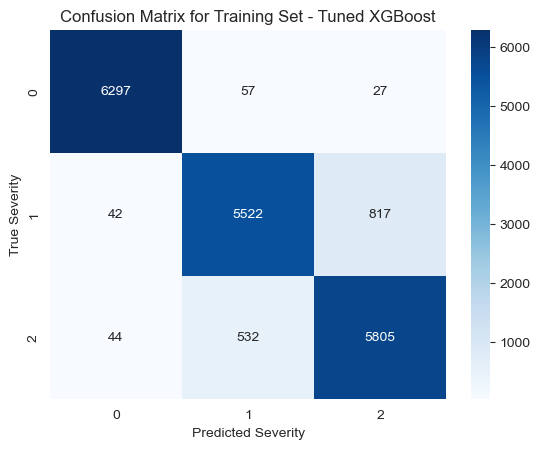

Classification Report for Testing Set - Tuned XGBoost:
              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69        28
         1.0       0.41      0.42      0.42       365
         2.0       0.86      0.86      0.86      1539

    accuracy                           0.77      1932
   macro avg       0.65      0.66      0.65      1932
weighted avg       0.77      0.77      0.77      1932



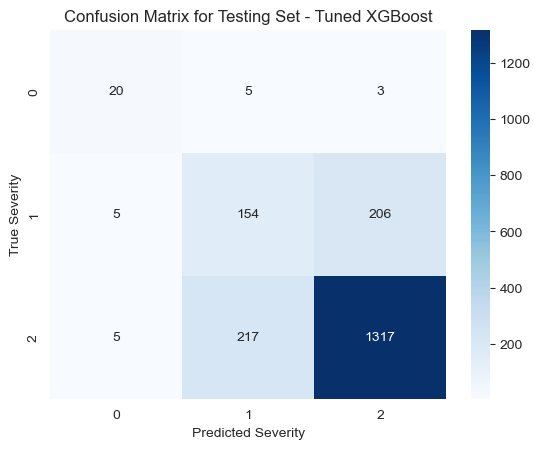

In [13]:
from xgboost import XGBClassifier

# Adjusting labels to start from 0 instead of 1
y_smote_adj = y_smote - 1
y_test_adj = y_test - 1

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Defining the hyperparameters and their values to be tested
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Setting up the grid search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Performing the grid search on the training data with adjusted labels
grid_search_xgb.fit(X_smote, y_smote_adj)

print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best score for XGBoost: {grid_search_xgb.best_score_}")

# Retraining the model with the best parameters found
xgb_best = XGBClassifier(**grid_search_xgb.best_params_, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_best.fit(X_smote, y_smote_adj)

# Predicting on the training set with the best parameters
y_train_pred_best_xgb = xgb_best.predict(X_smote)

# Classification report for the training set
print("Classification Report for Training Set - Tuned XGBoost:")
print(classification_report(y_smote_adj, y_train_pred_best_xgb))

# Confusion matrix for the training set
conf_matrix_train_best_xgb = confusion_matrix(y_smote_adj, y_train_pred_best_xgb)
sns.heatmap(conf_matrix_train_best_xgb, annot=True, fmt='d', cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix for Training Set - Tuned XGBoost')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()

# Predicting on the test set with the best parameters
y_test_pred_best_xgb = xgb_best.predict(X_test)

# Classification report for the test set
print("Classification Report for Testing Set - Tuned XGBoost:")
print(classification_report(y_test_adj, y_test_pred_best_xgb))

# Confusion matrix for the test set
conf_matrix_test_best_xgb = confusion_matrix(y_test_adj, y_test_pred_best_xgb)
sns.heatmap(conf_matrix_test_best_xgb, annot=True, fmt='d', cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix for Testing Set - Tuned XGBoost')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()

The XGBoost algorithm, after hyperparameter tuning showed a learning rate of 0.3, max depth of 9, and 100 estimators.

The training set demonstrates a strong precision-recall balance for all types of accidents, indicating the model's ability to distinguish between the most, moderate, and least severe outcomes. The confusion matrix shows that XGBoost has been effective, with constant accuracy that can be compared to Random Forest's performance.

Testing set results reveal a respectable predictive capability, particularly for `minor accidents (Class 2.0)`, maintaining a 77% accuracy.

## 5.5 Summary and Model Selection:

After analysing and comparing all of the model outputs, the XGBoost model has the best scores, outperforming the other models in terms of robustness and accuracy. After analysing and comparing all of the model outputs, the XGBoost model received the highest ratings, beating the other candidates in terms of robustness and accuracy. It is appropriate for a practical application due to its high recall for serious accidents and overall predictive dependability. Hence, this model can be chosen for deployment to help with design and policy-making decisions that improve vehicle safety and reduce accident severity.

# 6. Conclusion:

The analysis using multiple machine learning models found that the XGBoost model with hyperparameters tuning, delivered the most balanced performance in predicting accident severity for the Audi A3. XGBoost's capacity to distinguish between severity classifications, particularly in recognizing the most severe accidents, fits in with the company's goal of improving vehicle safety. The findings highlight possible design and policy initiatives that might reduce accident severity, boosting the car manufacturer's commitment to safety and innovation.

# 7. Possible Future Improvements:

For future research, additional features that could influence accident outcomes, such as driver behavior patterns and vehicle safety feature usage should be included. Further analysis could also be to refine data on accident conditions and the post-accident response. Advanced modeling techniques like neural networks might reveal complex patterns not captured by the current models. Lastly, implementing a continuous feedback loop where the model is periodically updated with new data could ensure that predictions remain relevant as driving conditions and vehicle designs evolve.

In [16]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [17]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1370


# 8. References

imbalanced-learn.org. (n.d.). SMOTE — Version 0.12.2. [online] Available at: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#smote [Accessed 3 Apr. 2024].

scikit learn (2019). sklearn.tree.DecisionTreeClassifier — scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

Scikit-learn (2018). sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

scikit-learn (2014). sklearn.linear_model.LogisticRegression — scikit-learn 0.21.2 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

xgboost.readthedocs.io. (n.d.). Get Started with XGBoost — xgboost 1.7.5 documentation. [online] Available at: https://xgboost.readthedocs.io/en/stable/get_started.html.
